## Transfer Learning ResNet50 using Keras

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [4]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in resnet.layers:
    layer.trainable = False

In [6]:
folders = glob('Datasets/train/*')

In [7]:
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\tarun\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
574/574 [==============================] - 268s 449ms/step - loss: 3.1095 - accuracy: 0.2654 - val_loss: 1.8001 - val_accuracy: 0.5333
Epoch 2/10
574/574 [==============================] - 248s 432ms/step - loss: 1.8569 - accuracy: 0.4511 - val_loss: 2.2443 - val_accuracy: 0.4070
Epoch 3/10
574/574 [==============================] - 256s 446ms/step - loss: 1.8725 - accuracy: 0.4816 - val_loss: 2.3301 - val_accuracy: 0.4150
Epoch 4/10
574/574 [==============================] - 238s 415ms/step - loss: 1.5899 - accuracy: 0.5319 - val_loss: 2.3408 - val_accuracy: 0.4556
Epoch 5/10
574/574 [==============================] - 212s 369ms/step - loss: 1.6095 - accuracy: 0.5347 - val_loss: 2.3074 - val_accuracy: 0.4907
Epoch 6/10
574/574 [==============================] - 226s 393ms/step - loss: 1.4324 - accuracy: 0.5747 - val_loss: 2.2850 - val_accuracy: 0.5298
Epoch 7/10
574/574 [==============================] - 225s 393ms/step - loss: 1.6312 - accuracy: 0.5523 - val_loss: 1.4003 -

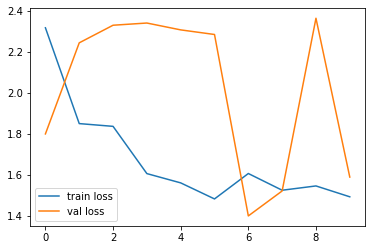

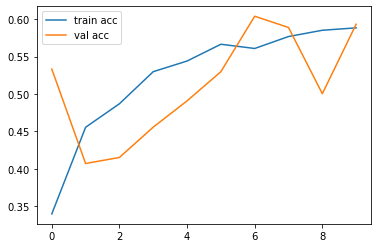

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
model.save('model_resnet50.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred